# 다중선형회귀

독립변수가 두 개 이상인 경우의 회귀분석

분석 정확도를 높이기 위해 적절하지 않은 변수를 추려내는 과정을 반복적으로 수행하여 최적의 독립변수 그룹을 찾아내는 것을 목표로 한다.

## #01. 작업 준비

### 1) 패키지 참조

In [1]:
from pandas import read_excel, DataFrame
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sb
import sys
import os
import statsmodels.api as sm

In [2]:
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import myOls

### 2) 데이터 가져오기

| 필드 | 설명 |
|---|---|
| CRIM | 범죄율 |
| ZN | 25,000 평방피트를 초과 거주지역 비율 |
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우는 1, 아니면 0 |
| NOX | 일산화질소 농도 |
| RM | 주택당 방 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터의 거리 |
| RAD | 방사형 고속도로까지의 거리 |
| TAX | 재산세율 |
| PTRATIO | 학생/교사 비율 |
| B | 인구 중 흑인 비율 |
| LSTAT | 인구 중 하위 계층 비율 |
| MEDV | 집값 |
| CAT.MEDV | $3000 이상 여부 |

In [3]:
df = read_excel("https://data.hossam.kr/E04/boston.xlsx")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [4]:
df.shape

(506, 15)

## #02. 파이썬의 ols 객체로 분석 (맛보기)

임의의 독립변수를 선정하여 분석 수행

In [5]:
model = ols("MEDV ~ CRIM + INDUS", data=df)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     96.83
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           2.66e-36
Time:                        16:53:10   Log-Likelihood:                -1757.8
No. Observations:                 506   AIC:                             3522.
Df Residuals:                     503   BIC:                             3534.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.2483      0.670     43.624      0.000      27.931      30.566
CRIM          -0.2455      0.044     -5.536      0.000      -0.333      -0.158
INDUS         -0.5234      0.056     -9.414      0.000      -0.633      -0.414
==============================================================================
Omnibus:                      193.751   Durbin-Watson:                   0.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              653.883
Skew:                           1.800   Prob(JB):                    1.03e-142
Kurtosis:                       7.248   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## #03. 모듈화 한 기능을 활용

### 1) 모든 변수 사용하기

#### 모든 독립변수의 이름을 리스트로 생성

In [6]:
cls = list(df.columns)
cls.remove("MEDV")
cls.remove("CAT. MEDV")
cls

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

#### 분석 수행

In [7]:
#분석 수행
ols_result = myOls(df, x=cls, y="MEDV")

In [8]:
print(ols_result.summary)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          6.72e-135
Time:                        16:53:10   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

### 분석 결과 표 확인

In [9]:
#분석 결과 표 확인
ols_result.table

B   표준오차  β         t   유의확률         VIF
종속변수 독립변수                                                    
MEDV CRIM      -0.1080  0.033  0   -3.287*  0.001    2.160156
     ZN         0.0464  0.014  0    3.382*  0.001    3.043697
     INDUS      0.0206  0.061  0    0.334*  0.738   14.755787
     CHAS       2.6867  0.862  0    3.118*  0.002    1.180552
     NOX      -17.7666  3.820  0   -4.651*  0.000   74.549360
     RM         3.8099  0.418  0    9.116*  0.000  136.875365
     AGE        0.0007  0.013  0    0.052*  0.958   21.541039
     DIS       -1.4756  0.199  0   -7.398*  0.000   16.044949
     RAD        0.3060  0.066  0    4.613*  0.000   15.404871
     TAX       -0.0123  0.004  0   -3.280*  0.001   61.939733
     PTRATIO   -0.9527  0.131  0   -7.283*  0.000   91.819346
     B          0.0093  0.003  0    3.467*  0.001   21.669504
     LSTAT     -0.5248  0.051  0  -10.347*  0.000   12.824787

### VIF가 10 이상인 값을 제외하고 다시 분석

In [10]:
### VIF가 10 이상인 값을 제외하고 다시 분석

ols_result2 = myOls(df, x="CRIM,ZN,CHAS".split(","), y="MEDV")

In [11]:
print(ols_result2.summary)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     59.67
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           5.23e-33
Time:                        16:53:10   Log-Likelihood:                -1763.1
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     502   BIC:                             3551.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.9715      0.449     48.937      0.0

In [12]:
ols_result2.table

B   표준오차  β        t   유의확률       VIF
종속변수 독립변수                                             
MEDV CRIM  -0.3398  0.042  0  -8.108*  0.000  2.160156
     ZN     0.1199  0.015  0   7.761*  0.000  3.043697
     CHAS   6.1729  1.392  0   4.435*  0.000  1.180552

In [13]:
ols_result2.result

'𝑅(0.263), 𝑅^2(0.258), 𝐹(59.67), 유의확률(5.23e-33), Durbin-Watson(0.821)'

In [14]:
ols_result2.goodness

'MEDV에 대하여 CRIM,ZN,CHAS로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(3,502) = 59.67, p < 0.05).'

In [15]:
ols_result2.varstr

['CRIM의 회귀계수는 -0.3398(p<0.05)로, MEDV에 대하여 유의미한 예측변인인 것으로 나타났다.',
 'ZN의 회귀계수는 0.1199(p<0.05)로, MEDV에 대하여 유의미한 예측변인인 것으로 나타났다.',
 'CHAS의 회귀계수는 6.1729(p<0.05)로, MEDV에 대하여 유의미한 예측변인인 것으로 나타났다.']

### 변수를 다시 선정하여 진행

In [16]:
names3 = ["CRIM", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
ols_result3 = myOls(df, x=names3, y="MEDV")

In [17]:
print(ols_result3.summary)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.023e+29
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:53:10   Log-Likelihood:                 14670.
No. Observations:                 506   AIC:                        -2.931e+04
Df Residuals:                     493   BIC:                        -2.926e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.087e-14    6.7e-14      0.311      0.7

In [18]:
ols_result3.table

B      표준오차  β          t   유의확률         VIF
종속변수 독립변수                                                          
MEDV CRIM      1.559e-16   4.2e-16  0     0.371*  0.711    2.160156
     INDUS     3.548e-16   7.8e-16  0     0.455*  0.650   14.755787
     CHAS      7.452e-15  1.15e-14  0     0.649*  0.517    1.180552
     NOX      -1.193e-14  5.08e-14  0    -0.235*  0.814   74.549360
     RM       -5.621e-15  5.95e-15  0    -0.945*  0.345  136.875365
     AGE      -2.265e-15  1.73e-16  0   -13.072*  0.000   21.541039
     DIS       1.416e-15  2.52e-15  0     0.562*  0.574   16.044949
     TAX       3.318e-16  2.99e-17  0    11.102*  0.000   61.939733
     PTRATIO  -6.661e-16  1.69e-15  0    -0.393*  0.694   91.819346
     B         6.221e-17  3.58e-17  0     1.738*  0.083   21.669504
     LSTAT    -1.839e-16  7.32e-16  0    -0.251*  0.802   12.824787
     MEDV         1.0000  5.79e-16  0  1.73e+15*  0.000   37.854383

## #04. 결과 비교하기

In [19]:
실제집값 = df["MEDV"]
실제집값

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [20]:
result1 = fit.predict(df.filter(cls))
result1

0      28.037800
1      25.541497
2      25.541501
3      28.099441
4      28.090437
         ...    
501    22.989340
502    22.993602
503    22.989799
504    22.977812
505    22.993076
Length: 506, dtype: float64

In [21]:
result2 = ols_result2.fit.predict(df.filter(['CRIM','ZN','CHAS']))
result2

0      24.127287
1      21.962235
2      21.962242
3      21.960515
4      21.948050
         ...    
501    21.950232
502    21.956131
503    21.950867
504    21.934273
505    21.955404
Length: 506, dtype: float64

In [22]:
result3 = ols_result3.fit.predict(df.filter(names3))
result3

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [23]:
result_df = DataFrame({
    "실제집값":실제집값,
    "예측집값1":result1,
    "예측집값2":result2,
    "예측집값3":result3
})
result_df

,실제집값,예측집값1,예측집값2,예측집값3
0,24.0,28.037800,24.127287,24.0
1,21.6,25.541497,21.962235,21.6
2,34.7,25.541501,21.962242,34.7
3,33.4,28.099441,21.960515,33.4
4,36.2,28.090437,21.948050,36.2
...,...,...,...,...
501,22.4,22.989340,21.950232,22.4
502,20.6,22.993602,21.956131,20.6
503,23.9,22.989799,21.950867,23.9
504,22.0,22.977812,21.934273,22.0


c:\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 5276

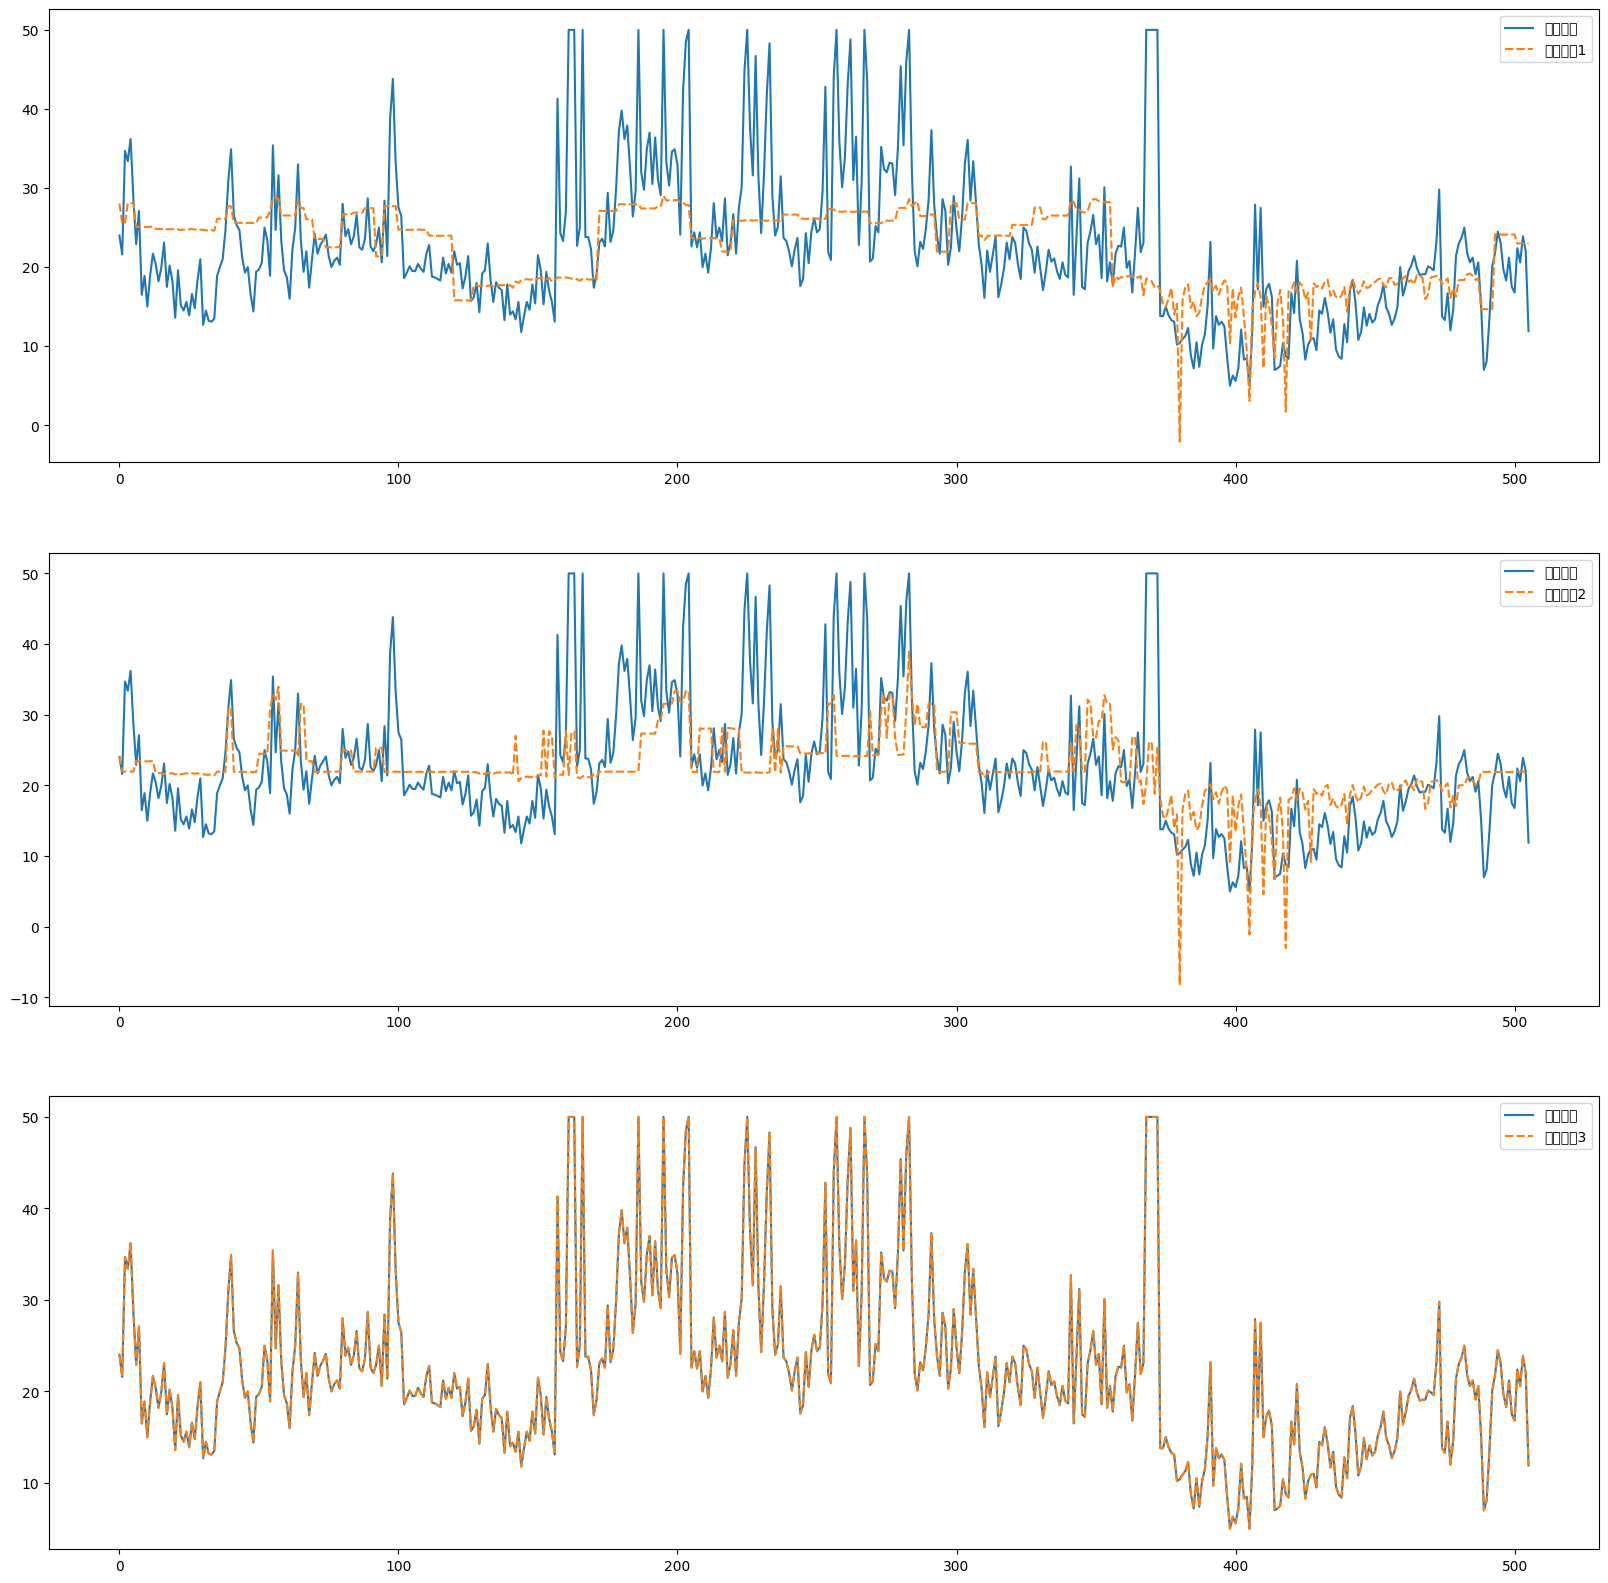

In [24]:
plt.rcParams["figure.figsize"] = (20, 20)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

sb.lineplot(data=result_df.filter(['실제집값', '예측집값1']), ax=ax1)
sb.lineplot(data=result_df.filter(['실제집값', '예측집값2']), ax=ax2)
sb.lineplot(data=result_df.filter(['실제집값', '예측집값3']), ax=ax3)
plt.show()
plt.close()